## Hybrid Reciprocal Velocity Obstical

import library

RVO : it provides VO , RVO , HRVO method

vis : visualization tool

cv2 : visualization tool

In [1]:
import sys
from RVO import RVO_update, reach, compute_V_des, reach
from vis import visualize_traj_dynamic
import cv2

define workspace model
------------

In [2]:
ws_model = dict()

robot radius
-----

In [3]:
ws_model['robot_radius'] = 0.3

circular obstacles, format [x,y,rad]
--------

with obstacles

    ws_model['circular_obstacles'] = [[-0.3, 2.5, 0.3], [1.5, 2.5, 0.3], [3.3, 2.5, 0.3], [5.1, 2.5, 0.3]]
    

no obstacles

    ws_model['circular_obstacles'] = []

In [4]:
ws_model['circular_obstacles'] = []

rectangular boundary, format [x,y,width/2,heigth/2]
--------

In [5]:
ws_model['boundary'] = [] 

initialization for robot
------

position of [x,y]

In [6]:
X = [[5,5],[5,0],[0,0],[0,5]]

velocity of [vx,vy]

In [7]:
V = [[0,0] for i in xrange(len(X))]

NameError: name 'xrange' is not defined

maximal velocity norm

In [8]:
V_max = [1 for i in xrange(len(X))]

NameError: name 'xrange' is not defined

goal of [x,y]

In [9]:
goal = [[0,0],[0,5],[5,5],[5,0]]

simulation setup
-------

total simulation time (s)

In [10]:
total_time = 15

simulation step

In [11]:
step = 0.01

simulation starts
----

In [ ]:
t = 0
while t*step < total_time:
    # compute desired vel to goal
    V_des = compute_V_des(X, goal, V_max)
    # compute the optimal vel to avoid collision
    V = RVO_update(X, V_des, V, ws_model)
    # update position
    for i in xrange(len(X)):
        X[i][0] += V[i][0]*step
        X[i][1] += V[i][1]*step
    #----------------------------------------
    # visualization
    if t%10 == 0:
        #visualize_traj_dynamic(ws_model, X, V, goal, time=t*step, name='data/snap%s.pdf'%str(t/10))
        visualize_traj_dynamic(ws_model, X, V, goal, time=t*step, name='data/snap%s.png'%str(t/10))
        #print ("output result ",t/10)
        img = cv2.imread("data/snap%s.png"%str(t/10))
        
        #show output image
        heigth , width , _ = img.shape
        img = cv2.resize(img,(width/2,heigth/2))
        cv2.imshow("hrvo_demo",img)
        cv2.waitKey(1)
    t += 1

In [44]:
        
    def line_obstacle(startpoint,endpoint):
        import matplotlib.pyplot as plt
        start = (startpoint[0],startpoint[1])
        end = (endpoint[0],endpoint[1])
        radius = 5
        ws_model = dict()
        ws_model['circular_obstacles'] = []
        x_difference = start[0]-end[0]
        y_difference = start[1]-end[1]
        figure, axes = plt.subplots()

        if(abs(x_difference) > abs(y_difference)):
            point_diff = int(abs(x_difference)/radius)
        else:
            point_diff = int(abs(y_difference)/radius)

        for point in range(point_diff+1):
            #print(point)
            ws_model['circular_obstacles'].append((start[0]-((x_difference/point_diff)*point),start[1]-((y_difference/point_diff)*point),radius))
            draw_circle = plt.Circle(((start[0]-((x_difference/point_diff)*point), start[1]-((y_difference/point_diff)*point))), radius,fill=False)
            axes.add_artist(draw_circle)

        print(ws_model['circular_obstacles'])



        axes.set_aspect(1)
        # axes.add_artist(draw_circle)
        plt.title('Circle')
        plt.xlim((-50,50))
        plt.ylim((-100,-200))
        plt.show()




<class 'list'>
[(6.5, -170.0, 5), (6.733333333333333, -164.75, 5), (6.966666666666667, -159.5, 5), (7.2, -154.25, 5), (7.433333333333334, -149.0, 5), (7.666666666666667, -143.75, 5), (7.9, -138.5, 5), (8.133333333333333, -133.25, 5), (8.366666666666667, -128.0, 5), (8.600000000000001, -122.75, 5), (8.833333333333334, -117.5, 5), (9.066666666666666, -112.25, 5), (9.3, -107.0, 5)]


/tmp/ipykernel_8913/1242076699.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f)


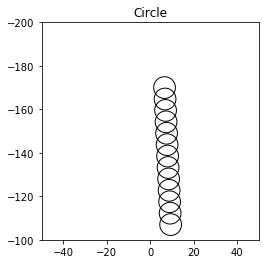

In [51]:
import yaml

with open('obstacle.yaml', 'r') as f:
    data = yaml.load(f)

print(type(data["start_point1"]))

line_obstacle(data["start_point1"],data["end_point1"])